**Multiindex objects**

In [1]:
import numpy as np
import pandas as pd

In [9]:
#wrong way
index_val=[("cse",2019),("cse",2020),("cse",2021),("cse",2022),("ece",2019),("ece",2020),("ece",2021),("ece",2022)]

In [5]:
a=pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [6]:
a[("cse",2019)]

1

In [8]:
#the problem?
#if we want to fetch only cse details then--key error
# a["cse"]

In [10]:
#the solution->multiindex series(also known as heirarchical indexing).
#multiple index levels within a single index

In [13]:
#how to create multiindex object
#1.pd.multiindex_from_tuples()
index_val=[("cse",2019),("cse",2020),("cse",2021),("cse",2022),("ece",2019),("ece",2020),("ece",2021),("ece",2022)]
multiindex=pd.MultiIndex.from_tuples(index_val)
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [14]:
multiindex.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [15]:
pd.MultiIndex.from_product([["cse","ece"],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [17]:
#creating series
s=pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [18]:
#how to fetch items 
s[("cse",2019)]

1

In [19]:
s["cse"]

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [21]:
#unstack
temp=s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [22]:
#stack
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [23]:
#multiindex dataframe

In [24]:
branch_df1=pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16]
    ],
    index=multiindex,
    columns=["avg_package","students"]
)
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [25]:
branch_df1.loc["cse"]

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [26]:
#multiindex df from columns perspective
branch_df2=pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        
    ],
    index=[2019,2020,2021,2022],
    columns=pd.MultiIndex.from_product([["delhi","mumbai"],["avg_package","students"]])
)
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [28]:
branch_df2["delhi"]["students"]

2019    2
2020    4
2021    6
2022    8
Name: students, dtype: int64

In [29]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [31]:
#multiindex df in terms of both cols and index
branch_df3=pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
        
    ],
    index=multiindex,
    columns=pd.MultiIndex.from_product([["delhi","mumbai"],["avg_package","students"]])
)
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

**Stacking and Unstacking**

In [32]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [34]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [35]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [37]:
branch_df1.unstack().stack()

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\1991893145.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack()


avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [38]:
branch_df1.unstack().stack().stack()

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\2994828746.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack().stack()


cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [39]:
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [40]:
branch_df2.unstack()

delhi   avg_package  2019    1
                     2020    3
                     2021    5
                     2022    7
        students     2019    2
                     2020    4
                     2021    6
                     2022    8
mumbai  avg_package  2019    0
                     2020    0
                     2021    0
                     2022    0
        students     2019    0
                     2020    0
                     2021    0
                     2022    0
dtype: int64

In [41]:
branch_df2.stack()

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\3132666484.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack()


delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [42]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [43]:
branch_df3.unstack()

delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0        0    0    0    0

In [44]:
branch_df3.stack()

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\4148153360.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack()


delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

**Working with MultiIndex dataframes**

In [47]:
branch_df3.head()
branch_df3.shape
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [49]:
branch_df3.unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, cse to ece
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   (delhi, avg_package, 2019)   2 non-null      int64
 1   (delhi, avg_package, 2020)   2 non-null      int64
 2   (delhi, avg_package, 2021)   2 non-null      int64
 3   (delhi, avg_package, 2022)   2 non-null      int64
 4   (delhi, students, 2019)      2 non-null      int64
 5   (delhi, students, 2020)      2 non-null      int64
 6   (delhi, students, 2021)      2 non-null      int64
 7   (delhi, students, 2022)      2 non-null      int64
 8   (mumbai, avg_package, 2019)  2 non-null      int64
 9   (mumbai, avg_package, 2020)  2 non-null      int64
 10  (mumbai, avg_package, 2021)  2 non-null      int64
 11  (mumbai, avg_package, 2022)  2 non-null      int64
 12  (mumbai, students, 2019)     2 non-null      int64
 13  (mumbai, students, 2020)     2 non-null      int64
 14 

In [50]:
#extracting rows single
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [51]:
branch_df3.loc[("cse",2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [53]:
branch_df3.loc[("cse",2019):("ece",2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [54]:
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [55]:
#extracting cols
branch_df3["delhi"]

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [56]:
branch_df3["delhi"]["students"]

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [57]:
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [58]:
#extracting both
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [62]:
#sort index
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[False,True])
branch_df3.sort_index(level=1,ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [63]:
#multiindex dataframe(col)->transpose
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [64]:
#swaplevel
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [65]:
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

**long vs Wide Data**

**Wide** is where we have a single row for every datapoint with multiple columns to hold the values of various attributes.

**Long** is where,for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for given data point.

In [67]:
#melt->single example branch
#wide to long
pd.DataFrame({"cse":[120]}).melt()

,variable,value
0,cse,120


In [68]:
pd.DataFrame({"cse":[120],"ece":[130],"mech":[20]})

,cse,ece,mech
0,120,130,20


In [69]:
pd.DataFrame({"cse":[120],"ece":[130],"mech":[20]}).melt()

,variable,value
0,cse,120
1,ece,130
2,mech,20


In [70]:
pd.DataFrame({"cse":[120],"ece":[130],"mech":[20]}).melt(var_name="branch",value_name="num_students")

,branch,num_students
0,cse,120
1,ece,130
2,mech,20


In [71]:
pd.DataFrame(
    {
        "branch":["cse","ece","mech"],
        "2020":[100,150,60],
        "2021":[120,110,90],
        "2022":[150,140,70]
    }
).melt()

,variable,value
0,branch,cse
1,branch,ece
2,branch,mech
3,2020,100
4,2020,150
5,2020,60
6,2021,120
7,2021,110
8,2021,90
9,2022,150


In [73]:
pd.DataFrame(
    {
        "branch":["cse","ece","mech"],
        "2020":[100,150,60],
        "2021":[120,110,90],
        "2022":[150,140,70]
    }
).melt(id_vars=["branch"],var_name="year",value_name="students")

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,110
5,mech,2021,90
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [77]:
death=pd.read_csv(r"Datasets/time_series_covid19_deaths_global.csv")
confirm=pd.read_csv(r"Datasets/time_series_covid19_confirmed_global.csv")

In [78]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [79]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [81]:
death.shape
confirm.shape

(289, 1081)

In [83]:
death=death.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="date",value_name="num_deaths")
confirm=confirm.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="date",value_name="num_cases")

In [85]:
confirm.merge(death,on=["Province/State","Country/Region","Lat","Long","date"])[["Country/Region","date","num_deaths","num_cases"]]


,Country/Region,date,num_deaths,num_cases
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,5708,703228
311249,Winter Olympics 2022,1/2/23,0,535
311250,Yemen,1/2/23,2159,11945
311251,Zambia,1/2/23,4024,334661


**Pivot Table**

Pivot table takes simple columnwise data as input ,and groups the entires into a two dimensional table that provides a multidimensional summarization of the data.

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns

In [89]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [92]:
df.groupby("sex")[["total_bill"]].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\4156014264.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex")[["total_bill"]].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [93]:
df.groupby(["sex","smoker"])[["total_bill"]].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\3092083924.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["sex","smoker"])[["total_bill"]].mean()


total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [94]:
df.groupby(["sex","smoker"])[["total_bill"]].mean().unstack()

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\2371648152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["sex","smoker"])[["total_bill"]].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [96]:
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=True)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [97]:
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=True,aggfunc="sum")

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [100]:
#all cols together
df.pivot_table(index="sex",columns="smoker",values=["tip","size","total_bill"])

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\1584148961.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index="sex",columns="smoker",values=["tip","size","total_bill"])


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [102]:
#multidimensional
df.pivot_table(index=["sex","smoker"],columns=["day","time"],values=["total_bill","size","tip"],aggfunc={"total_bill":"sum","size":"mean","tip":"max"})

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\3547489741.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=["sex","smoker"],columns=["day","time"],values=["total_bill","size","tip"],aggfunc={"total_bill":"sum","size":"mean","tip":"max"})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [104]:
df.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="sum",margins=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13636\2346004155.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="sum",margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [106]:
#plotting graphs
df=pd.read_csv(r"Datasets/expense_data.csv")

In [107]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [109]:
df["Category"].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [112]:
df["Date"]=pd.to_datetime(df["Date"])

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [115]:
df["Month"]=df["Date"].dt.month_name()

In [116]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [119]:
df.pivot_table(index="Month",columns="Category",values="INR")

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,2750.0,518.0,196.0,NaN,112.995088,NaN,4800.0,137.692308,NaN,NaN,400.0,256.86,182.80
February,NaN,399.0,NaN,NaN,214.609615,NaN,702.0,2000.000000,NaN,NaN,NaN,900.00,507.88
January,1000.0,NaN,NaN,1400.0,207.102500,NaN,4580.0,399.333333,NaN,8000.0,NaN,200.00,285.00
March,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,300.000000,NaN,NaN,NaN,NaN,30.00
November,2000.0,NaN,NaN,NaN,122.092308,115.0,NaN,2000.000000,3.0,NaN,NaN,NaN,66.20


In [123]:
df.pivot_table(index="Month",columns="Category",values="INR",fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,2750.0,518.0,196.0,0.0,112.995088,0.0,4800.0,137.692308,0.0,0.0,400.0,256.86,182.80
February,0.0,399.0,0.0,0.0,214.609615,0.0,702.0,2000.000000,0.0,0.0,0.0,900.00,507.88
January,1000.0,0.0,0.0,1400.0,207.102500,0.0,4580.0,399.333333,0.0,8000.0,0.0,200.00,285.00
March,0.0,0.0,0.0,0.0,65.000000,0.0,0.0,300.000000,0.0,0.0,0.0,0.00,30.00
November,2000.0,0.0,0.0,0.0,122.092308,115.0,0.0,2000.000000,3.0,0.0,0.0,0.00,66.20


<Axes: xlabel='Month'>

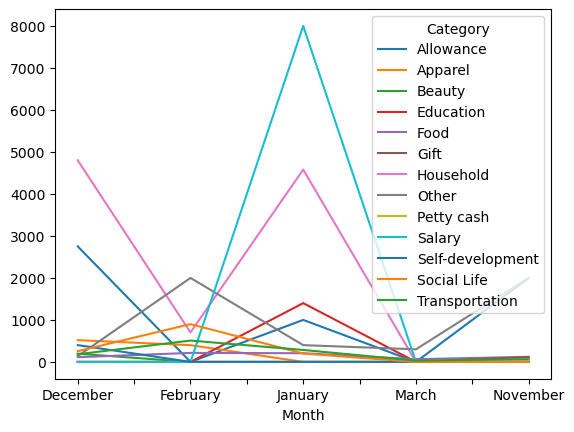

In [124]:
df.pivot_table(index="Month",columns="Category",values="INR",fill_value=0).plot()


<Axes: xlabel='Month'>

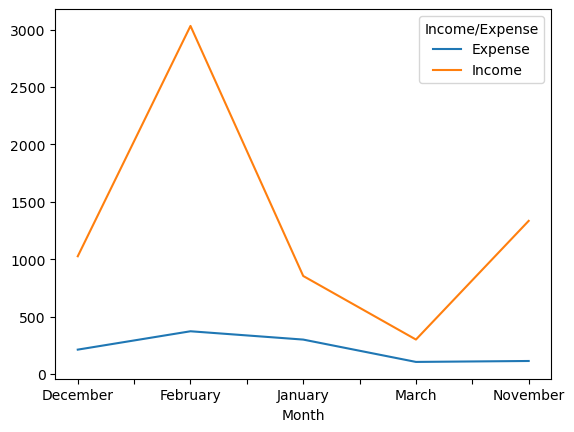

In [126]:
df.pivot_table(index="Month",columns="Income/Expense",values="INR",fill_value=0).plot()


**Pandas-Strings**

**Vectorized String Operations**

In [128]:
#what are the vectorized operations
a=np.array([1,2,3,4])
a*4 #this is the vectorized operation..if we apply one opoeration it apply to all  

array([ 4,  8, 12, 16])

In [129]:
#problem in vectorized operations in vanilla python-->if we have none then it is not possible
s=["cat","mat",None,"rat"]
[i.startswith("c") for i in s]

AttributeError: 'NoneType' object has no attribute 'startswith'

In [130]:
#how pandas solve this
s=pd.Series(["cat","mat",None,"rat"])
s

0     cat
1     mat
2    None
3     rat
dtype: object

In [131]:
#string accessor
s.str.startswith("c")

0     True
1    False
2     None
3    False
dtype: object

In [133]:
df=pd.read_csv(r"Datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [140]:
#common Functions
#lower/upper/captialize/title
df["Name"].str.lower()
df["Name"].str.upper()
df["Name"].str.capitalize()
df["Name"].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [146]:
#len
df["Name"][df["Name"].str.len()==82].values[0]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [148]:
#strip
"                sow       ".strip()

'sow'

In [149]:
df["Name"].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [154]:
#split
df["lastname"]=df["Name"].str.split(",").str.get(0)

In [155]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings


In [162]:
df[["title","firstname"]]=df["Name"].str.split(",").str.get(1).str.strip().str.split(" ",n=1,expand=True)

In [163]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry


In [167]:
df["title"].value_counts()

title
Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [166]:
#replace
df["title"]=df["title"].str.replace("Ms.","Miss.")
df["title"]=df["title"].str.replace("Mlle.","Miss.")

In [169]:
df["title"].value_counts()

title
Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [172]:
#filtering
#startswith/endwith
df[df["firstname"].str.startswith("A")]
df[df["firstname"].str.endswith("A")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Stewart,Mr.,Albert A
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q,Keane,Miss.,Nora A


In [173]:
#isdigit/isalpha
df[df["firstname"].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


In [175]:
#applying regex
#contains
#search john->both case
df[df["firstname"].str.contains("john",case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Turpin,Mrs.,William John Robert (Dorothy Ann Wonnacott)
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr.,William John
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Doling,Mrs.,John T (Ada Julia Bone)
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Barton,Mr.,David John
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Turpin,Mr.,William John Robert
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Cribb,Mr.,John Hatfield
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Bengtsson,Mr.,John Viktor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Goldsmith,Master.,"Frank John William ""Frankie"""
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr.,John D


In [178]:
#find lastnames with startswith and end vowel
df[df["lastname"].str.contains("^[aeiouAEIOU].+[aeiouAEIOU]$")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don.,Manuel E
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs.,Josef (Josefine Franchi)
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr.,Nassef Cassem
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Ali,Mr.,Ahmed
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr.,Josef
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr.,Ramon
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,Angle,Mrs.,"William A (Florence ""Mary"" Agnes Hughes)"
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Ali,Mr.,William
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Alhomaki,Mr.,Ilmari Rudolf


In [182]:
#slicing
df["Name"].str[::2]

0                    Ban,M.Oe ars
1      Cmns r.Jh rde Foec rgsTae)
2                     Hiknn is an
3          Ftel,Ms aqe et Ll a el
4                    Aln r ila er
                  ...            
886                   Mnvl,Rv uzs
887                Gaa,Ms.Mrae dt
888          Jhso,Ms.CteieHln"are
889                   Bh,M.Kr oel
890                    Doe,M.Ptik
Name: Name, Length: 891, dtype: object

**Date and Time in Pandas**

In [ ]:
#Timestamp object
#timestamp reference particular moments in time(oct 23rd,2025 at 7.00pm)

In [184]:
#creating timestamp objects
pd.Timestamp("2025/7/24")

Timestamp('2025-07-24 00:00:00')

In [185]:
type(pd.Timestamp("2025/7/24"))

pandas._libs.tslibs.timestamps.Timestamp

In [188]:
#variations
pd.Timestamp("2025-7-24")
pd.Timestamp("2025, 7, 24")

Timestamp('2025-07-24 00:00:00')

In [189]:
#only year
pd.Timestamp("2025")

Timestamp('2025-01-01 00:00:00')

In [191]:
#using text
pd.Timestamp("18 February 2026")

Timestamp('2026-02-18 00:00:00')

In [195]:
#providing time also
pd.Timestamp("18 February 2026 8:00AM")

Timestamp('2026-02-18 08:00:00')

In [196]:
#using datetime.datetime object
import datetime as dt
dt.datetime(2026,2,18,8,25,0)

datetime.datetime(2026, 2, 18, 8, 25)

In [198]:
x=pd.Timestamp(dt.datetime(2026,2,18,8,25,0))
x

Timestamp('2026-02-18 08:25:00')

In [204]:
#fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

0

In [208]:
import numpy as np
date=np.array("2026-02-18",dtype=np.datetime64)
date


array('2026-02-18', dtype='datetime64[D]')

In [209]:
date+np.arange(12)

array(['2026-02-18', '2026-02-19', '2026-02-20', '2026-02-21',
       '2026-02-22', '2026-02-23', '2026-02-24', '2026-02-25',
       '2026-02-26', '2026-02-27', '2026-02-28', '2026-03-01'],
      dtype='datetime64[D]')

**Datetime Index Object**

A collection of pandas timestamp

In [214]:
#from strings
pd.DatetimeIndex(["2025/1/1","2025/1/2","2025/1/3"])

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03'], dtype='datetime64[ns]', freq=None)

In [213]:
pd.DatetimeIndex(["2025/1/1","2025/1/2","2025/1/3"])[0]

Timestamp('2025-01-01 00:00:00')

In [217]:
#using python datetime object
pd.DatetimeIndex([dt.datetime(2025,1,1), dt.datetime(2025,1,2), dt.datetime(2025,1,3)])

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03'], dtype='datetime64[ns]', freq=None)

In [220]:
#using timestamp
dt_index=pd.DatetimeIndex([pd.Timestamp(2025,1,1), pd.Timestamp(2025,1,2), pd.Timestamp(2025,1,3)])

In [221]:
#using datetimeindex as series index
pd.Series([1,2,3], index=dt_index)

2025-01-01    1
2025-01-02    2
2025-01-03    3
dtype: int64

**date_range function**

In [223]:
#generate daily dates in a given range
pd.date_range(start="2025/7/2", end="2025/7/31",freq="D")

DatetimeIndex(['2025-07-02', '2025-07-03', '2025-07-04', '2025-07-05',
               '2025-07-06', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11', '2025-07-12', '2025-07-13',
               '2025-07-14', '2025-07-15', '2025-07-16', '2025-07-17',
               '2025-07-18', '2025-07-19', '2025-07-20', '2025-07-21',
               '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-25',
               '2025-07-26', '2025-07-27', '2025-07-28', '2025-07-29',
               '2025-07-30', '2025-07-31'],
              dtype='datetime64[ns]', freq='D')

In [224]:
#alternate days in a given range
pd.date_range(start="2025/7/2", end="2025/7/31",freq="2D")

DatetimeIndex(['2025-07-02', '2025-07-04', '2025-07-06', '2025-07-08',
               '2025-07-10', '2025-07-12', '2025-07-14', '2025-07-16',
               '2025-07-18', '2025-07-20', '2025-07-22', '2025-07-24',
               '2025-07-26', '2025-07-28', '2025-07-30'],
              dtype='datetime64[ns]', freq='2D')

In [244]:
#B->Business days
pd.date_range(start="2025/7/2", end="2025/7/31", freq="B")

DatetimeIndex(['2025-07-02', '2025-07-03', '2025-07-04', '2025-07-07',
               '2025-07-08', '2025-07-09', '2025-07-10', '2025-07-11',
               '2025-07-14', '2025-07-15', '2025-07-16', '2025-07-17',
               '2025-07-18', '2025-07-21', '2025-07-22', '2025-07-23',
               '2025-07-24', '2025-07-25', '2025-07-28', '2025-07-29',
               '2025-07-30', '2025-07-31'],
              dtype='datetime64[ns]', freq='B')

In [227]:
#W-one week per day
pd.date_range(start="2025/7/2", end="2025/7/31", freq="W-THU")

DatetimeIndex(['2025-07-03', '2025-07-10', '2025-07-17', '2025-07-24',
               '2025-07-31'],
              dtype='datetime64[ns]', freq='W-THU')

In [234]:
#H->Hourly data(factor)
pd.date_range(start="2025/7/2", end="2025/7/31", freq="6h")

DatetimeIndex(['2025-07-02 00:00:00', '2025-07-02 06:00:00',
               '2025-07-02 12:00:00', '2025-07-02 18:00:00',
               '2025-07-03 00:00:00', '2025-07-03 06:00:00',
               '2025-07-03 12:00:00', '2025-07-03 18:00:00',
               '2025-07-04 00:00:00', '2025-07-04 06:00:00',
               ...
               '2025-07-28 18:00:00', '2025-07-29 00:00:00',
               '2025-07-29 06:00:00', '2025-07-29 12:00:00',
               '2025-07-29 18:00:00', '2025-07-30 00:00:00',
               '2025-07-30 06:00:00', '2025-07-30 12:00:00',
               '2025-07-30 18:00:00', '2025-07-31 00:00:00'],
              dtype='datetime64[ns]', length=117, freq='6h')

In [236]:
#MS->month start
pd.date_range(start="2025/7/1", end="2025/7/31", freq="MS")

DatetimeIndex(['2025-07-01'], dtype='datetime64[ns]', freq='MS')

In [239]:
#YE-Year end
pd.date_range(start="2025/7/1", end="2030/7/31", freq="YE")

DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [243]:
#using periods(number of results)
pd.date_range(start="2025/7/1",periods=25, freq="ME")

DatetimeIndex(['2025-07-31', '2025-08-31', '2025-09-30', '2025-10-31',
               '2025-11-30', '2025-12-31', '2026-01-31', '2026-02-28',
               '2026-03-31', '2026-04-30', '2026-05-31', '2026-06-30',
               '2026-07-31', '2026-08-31', '2026-09-30', '2026-10-31',
               '2026-11-30', '2026-12-31', '2027-01-31', '2027-02-28',
               '2027-03-31', '2027-04-30', '2027-05-31', '2027-06-30',
               '2027-07-31'],
              dtype='datetime64[ns]', freq='ME')

**to_datetime function**

converts an existing objects to pandas timestamp/datetimeindex object

In [245]:
#simple series example

s=pd.Series(["2025/1/1","2025/1/2","2025/1/3"])

In [246]:
s

0    2025/1/1
1    2025/1/2
2    2025/1/3
dtype: object

In [249]:
pd.to_datetime(s)

0   2025-01-01
1   2025-01-02
2   2025-01-03
dtype: datetime64[ns]

In [251]:
pd.to_datetime(s).dt.month_name()

0    January
1    January
2    January
dtype: object

In [252]:
pd.to_datetime(s).dt.day_name()

0    Wednesday
1     Thursday
2       Friday
dtype: object

In [254]:
s=pd.Series(["2025/1/1","2025/1/2","2025/130/3"])

In [256]:
pd.to_datetime(s,errors="coerce")

0   2025-01-01
1   2025-01-02
2          NaT
dtype: datetime64[ns]

In [257]:
pd.to_datetime(s,errors="coerce").dt.year

0    2025.0
1    2025.0
2       NaN
dtype: float64

In [260]:
df=pd.read_csv(r"Datasets/expense_data.csv")

In [262]:
df.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [266]:
df["Date"]=pd.to_datetime(df["Date"])

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [268]:
#dt accessor
df["Date"].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [269]:
df["Date"].dt.day_name()

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

In [270]:
df["Date"].dt.is_quarter_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [271]:
df["Date"].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

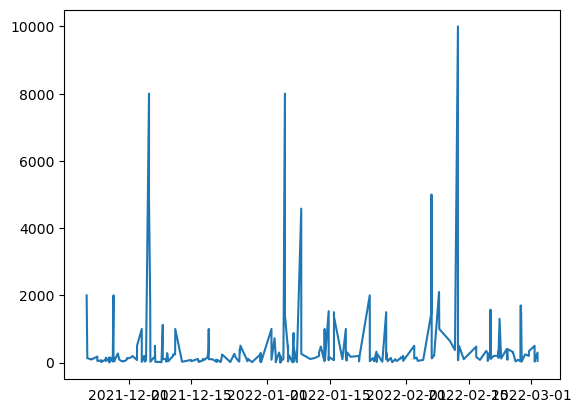

In [273]:
#plot graph
import matplotlib.pyplot as plt
plt.plot(df["Date"],df["INR"])

In [275]:
#day name wise bar chart/month wise bar chart
df["day_name"]=df["Date"].dt.day_name()

In [276]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

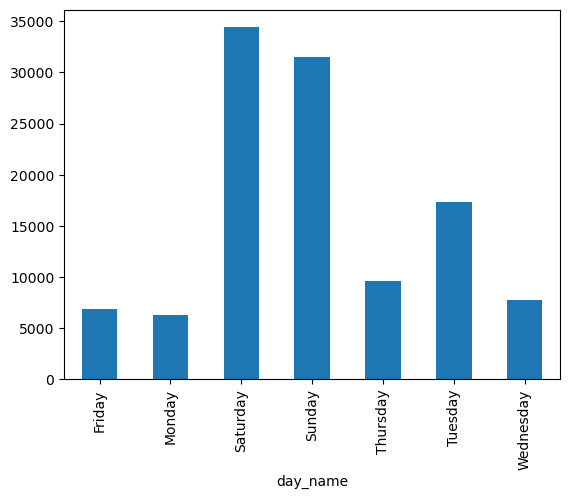

In [278]:
df.groupby("day_name")["INR"].sum().plot(kind="bar")

In [279]:
#month wise
df["month_name"]=df["Date"].dt.month_name()

In [280]:
df.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March


<Axes: xlabel='month_name'>

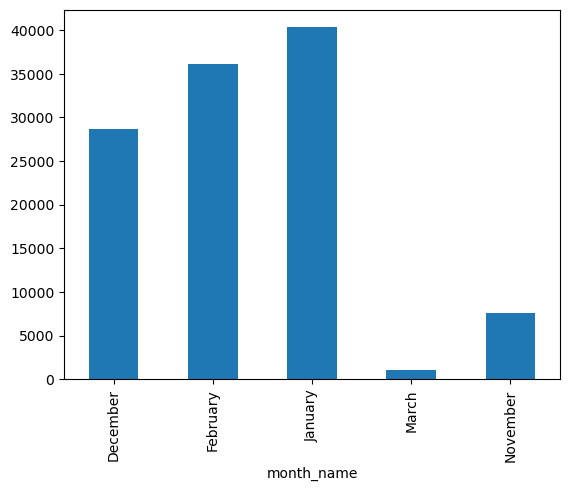

In [282]:
df.groupby("month_name")["INR"].sum().plot(kind="bar")

<Axes: xlabel='day_name'>

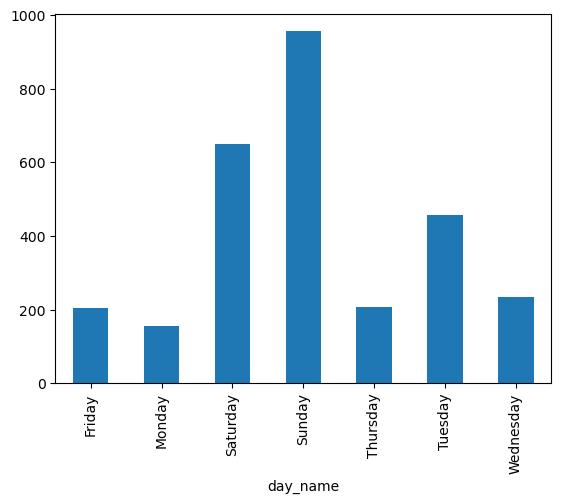

In [283]:
df.groupby("day_name")["INR"].mean().plot(kind="bar")

In [286]:
df[df["Date"].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November
